# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

### Setup

#### **Importing Libraries**

In [ ]:
# !pip install kneed

In [ ]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [ ]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [ ]:
final_fies

In [ ]:
final_fies.info()

### **6️⃣ Application of Proximity (Distance Analysis)**

#### Correlation Analysis

In [ ]:
def plot_correlation_heatmap(dataframe, aggregated_column, components, title):
    # Subset the dataframe
    subset = dataframe[[aggregated_column] + components]
    
    # Calculate the correlation matrix
    correlation_matrix = subset.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [ ]:
# Define the aggregated column and its components
aggregated_col = 'TOINC'
components_list = ['WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'IMPUTED_RENT', 'EAINC']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- The `WAGES` component shows the highest correlation with `TOINC` at 0.72, emphasizing the strong dependence of households in **NCR** on **employment income**, which aligns with the *region’s highly urbanized and service-driven economy*.
- `IMPUTED_RENT` follows with a correlation of 0.40, reflecting the significant role of homeownership among households in NCR. This value represents the monetary benefit households gain by living in their own property instead of paying rent, particularly relevant in NCR’s high property value context.
- `EAINC` (Entrepreneurial Activities Income) and `CASH_ABROAD` show moderate correlations of 0.18 and 0.17, respectively. These values suggest that while some households engage in small businesses or receive overseas remittances, self-employment and remittance income play a smaller role compared to wage dependency in shaping total household income in NCR.

In [ ]:
# Define the aggregated column and its components
aggregated_col = 'EAINC'
components_list = ['NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'LOSSES']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- `NET_RET` shows the highest correlation with EAINC at 0.84, indicating that retail and wholesale activities are the primary drivers of entrepreneurial income among Filipino households.
- No correlation was computed for `NET_FOR` due to all values being zero, which is expected given NCR’s highly urbanized setting and lacking of forestry-related activities.

In [ ]:
# Define the aggregated column and its components
aggregated_col = 'FOOD_HOME'
components_list = ['BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- Based on the heatmap correlation of `FOOD_HOME` and its components, the top three contributors to household food expenses are `MEAT` (0.84), `FISH` (0.80), and `BREAD` (0.75), highlighting the significant share of protein sources and staple foods in NCR households' consumption.
- Other notable contributors include `VEG` (0.66), `FRUIT` (0.59), `OIL` (0.52), `MILK` (0.50), and `SUGAR` (0.48), reflecting spending patterns focused on basic and versatile food items essential for daily meals.
- These correlations suggest that households in NCR prioritize essential and nutrient-rich food items over non-essential products such as `COFFEE`, `TEA`, or `COCOA`, which show lower correlations with total food-at-home expenditure.

In [ ]:
# Define the aggregated column and its components
aggregated_col = 'NFOOD'
components_list = ['ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- Based on the heatmap correlation of `NFOOD` and its components, the top contributors to non-food household expenses are `HOUSING_WATER` (0.80), `COMMUNICATION` (0.68), and `TRANSPORT` (0.56), highlighting the significant share of housing-related costs, connectivity, and mobility in NCR households' spending.
- Other notable components include `INSURANCE` (0.50), `MISCELLANEOUS` (0.46), `CLOTH` (0.43), `FURNISHING` (0.39), `EDUCATION` (0.39), and `HEALTH` (0.36), reflecting additional necessary expenditures related to financial security, personal needs, and social services.
- These correlations indicate that NCR households allocate most of their non-food spending to *essential living expenses*, while still maintaining moderate spending on education, health, and other personal and household-related needs.

In [ ]:
# Define the aggregated column and its components
aggregated_col = 'TOTEX'
components_list = ['FOOD', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 
                   'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
                   'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 
                   'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 
                   'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 
                   'FOOD_ACCOM_SRVC']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- `TOTEX` is composed of too many components, many of which have relatively low correlation

In [ ]:
# Define the aggregated column and its components
aggregated_col = 'TOTEX'
components_list = ['FOOD', 'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 
                   'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 
                   'MISCELLANEOUS']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- Based on the heatmap correlation of `TOTEX` and its components, `FOOD` (0.72) and `HOUSING_WATER` (0.71) emerge as the most significant contributors, underscoring the substantial share of basic needs—daily consumption and housing-related expenses—in total household expenditures.
    - `HOUSING_WATER` captures spending on *housing, water, electricity, gas, and other fuels*, reflecting the essential cost of maintaining a household, especially in highly urbanized areas like NCR where utility expenses are substantial.
- Other notable contributors include `COMMUNICATION` (0.67), `TRANSPORT` (0.57), `MISCELLANEOUS` (0.52), `INSURANCE` (0.49), and `CLOTH` (0.43), indicating that beyond food and housing, households also allocate significant portions of their expenses toward connectivity, mobility, financial security, and personal needs.

#### Distance Matrix Analysis

In [ ]:
### Review Total Income (TOINC) and Total Expenditure (TOTEX) Relationship
print(final_fies[['TOINC', 'TOTEX']].head(10))  # Show first 10 rows


In [ ]:
# Plotting the relationship between Total Income (TOINC) and Total Expenditure (TOTEX)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=final_fies,
    x='TOINC',
    y='TOTEX',
    hue='SOCIAL_CLASS',
    palette='viridis', 
    alpha=0.5
)
plt.title('Total Expenditure vs Total Income Colored by Social Class')
plt.xlabel('Total Income (TOINC)')
plt.ylabel('Total Expenditure (TOTEX)')
plt.legend(title='Social Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Prepare and scale the data while keeping the social class
fies_normalized = final_fies[['TOINC', 'TOTEX', 'SOCIAL_CLASS']].copy()
scaler = StandardScaler()
fies_normalized[['TOINC_scaled', 'TOTEX_scaled']] = scaler.fit_transform(fies_normalized[['TOINC', 'TOTEX']])

# Plot with hue based on SOCIAL_CLASS
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=fies_normalized, 
    x='TOINC_scaled', 
    y='TOTEX_scaled', 
    hue='SOCIAL_CLASS',
    alpha=0.6,
    palette='viridis'
)

plt.title('Scatter Plot of TOINC vs TOTEX [Normalized]')
plt.xlabel('Total Income (TOINC)')
plt.ylabel('Total Expenditure (TOTEX)')

plt.plot([-3, 3], [-3, 3], color='red', linestyle='--', label='y = x line')
plt.legend(title='Social Class')
plt.show()

- The normalized scatter plot reveals a strong positive linear trend between Total Income (`TOINC`) and Total Expenditure (`TOTEX`), where there are generally more households that spend less than they earn, as seen by points below the red y = x line
- The plot also shows that social class segmentation is distinct, with income groups clustering along the trend — lower-income households dominate the lower-left, while middle-income groups shift towards the upper-right.
- **Outliers** are present, particularly households above the y = x line, suggesting some spend beyond their income, which may indicate borrowing, debt, or reliance on other non-reported resources.

In [ ]:
# Compute the pairwise Euclidean distances (condensed form)
distance_matrix = pdist(fies_normalized[['TOINC_scaled', 'TOTEX_scaled']], metric='euclidean')

# Convert to a square form if you want to visualize or inspect distances
distance_square = squareform(distance_matrix)
print(distance_square.shape)  # Should be (n_households, n_households)


> The distance matrix was computed in condensed form for efficiency. While the square form offers interpretability, *it was not visualized due to size constraints*.

> After computing the Euclidean distances between households based on their Total Income (TOINC) and Total Expenditure (TOTEX), hierarchical clustering is applied to systematically group households exhibiting similar economic behaviors. This method allows for uncovering underlying patterns and relationships within the data, providing a structured way to segment and profile households based on their income and spending characteristics.

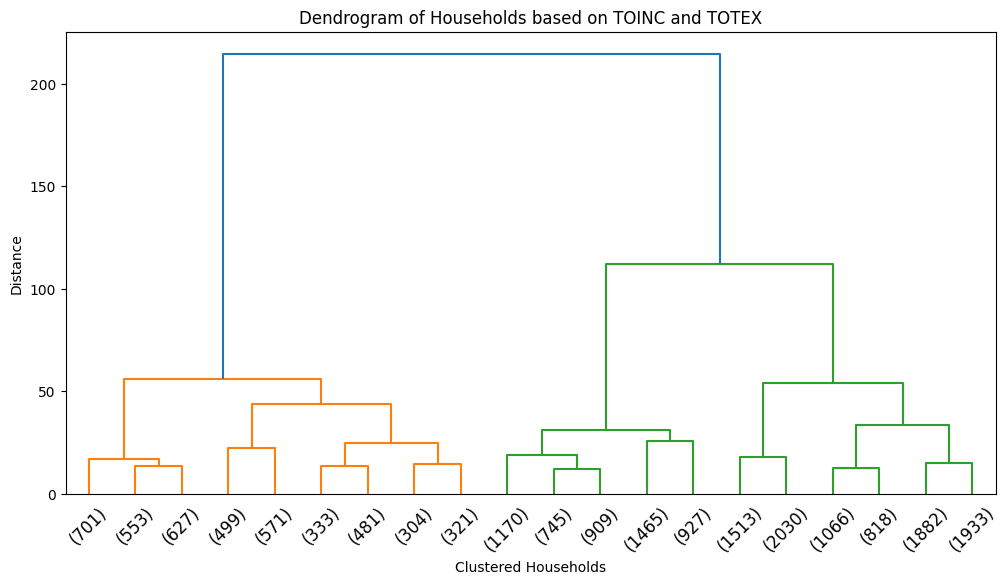

In [17]:
# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Optional: Visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=12)
plt.title('Dendrogram of Households based on TOINC and TOTEX')
plt.xlabel('Clustered Households')
plt.ylabel('Distance')
plt.show()


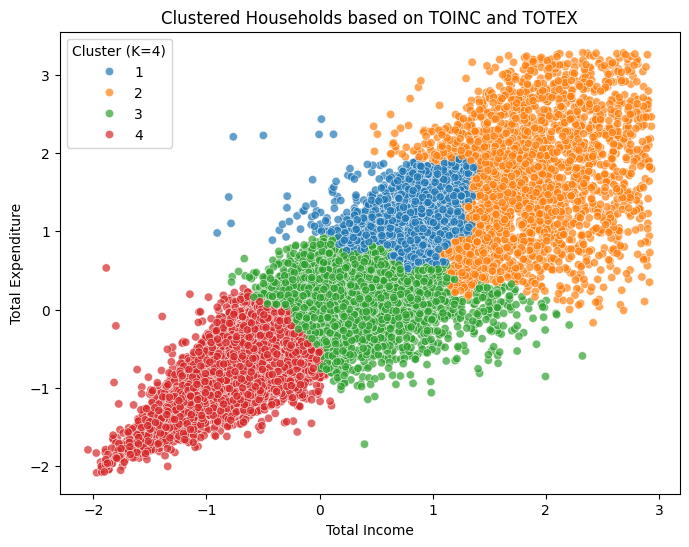

In [18]:
# Cut the dendrogram to form clusters (adjust t as needed)
fies_normalized['Cluster_K4'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=fies_normalized, 
    x='TOINC_scaled', 
    y='TOTEX_scaled', 
    hue='Cluster_K4', 
    palette='tab10', 
    alpha=0.7
)
plt.title('Clustered Households based on TOINC and TOTEX')
plt.xlabel('Total Income')
plt.ylabel('Total Expenditure')
plt.legend(title='Cluster (K=4)')
plt.show()


- The clusters align along a diagonal trend, **reinforcing the positive relationship between income and expenditure**—households with higher income generally spend more. The clusters effectively captures the economic progression across households in the dataset.
    - **Cluster 4 (Red):** Represents the households with the lowest income and expenditure, likely belonging to the poor and low-income classes facing financial constraints and limited spending capacity.
    - **Cluster 3 (Green):** Composed of households with moderate income but controlled spending, likely to reflect frugal low- to lower-middle-income families prioritizing efficient expense management.
    - **Cluster 1 (Blue):** Includes lower to middle-income households with balanced spending patterns, likely supported by stable employment or consistent income sources.
    - **Cluster 2 (Orange):** Captures the generally wealthier households with both high income and high expenditure, indicating greater financial flexibility and diversified consumption.

In [19]:
profile = final_fies.merge(fies_normalized[['Cluster_K4']], left_index=True, right_index=True)
cluster_profile = profile.groupby('Cluster_K4').agg({
    'TOINC': ['mean', 'median'],
    'TOTEX': ['mean', 'median'],
    'FSIZE': 'mean',
    'WAGES': 'mean',
    'EAINC': 'mean',
    'IMPUTED_RENT': 'mean',
    'FOOD': 'mean',
    'NFOOD': 'mean',
    'SOCIAL_CLASS': lambda x: x.value_counts(normalize=True).to_dict()
})

cluster_profile


TOINC                    TOTEX               FSIZE  \
                     mean    median           mean    median      mean   
Cluster_K4                                                               
1           551914.436672  558067.0  468772.272887  462343.0  4.818182   
2           752597.547059  742092.0  533247.350096  536016.5  4.835393   
3           455349.062456  441345.0  338374.074781  340870.5  4.252588   
4           267099.923105  269210.0  222562.532608  224774.5  3.381357   

                    WAGES         EAINC  IMPUTED_RENT           FOOD  \
                     mean          mean          mean           mean   
Cluster_K4                                                             
1           367515.455077  56943.367889  59694.071239  179326.192318   
2           525740.331208  68636.123555  74728.356317  189580.643208   
3           312661.615606  53101.469325  42315.269363  141434.868854   
4           175434.854036  29558.595650  28386.452499  100408.445972   

                    NFOOD                                       SOCIAL_CLASS  
                     mean                                           <lambda>  
Cluster_K4                                                                    
1           289446.080569  {'Lower-middle income': 0.9957469431153642, 'L...  
2           343666.706887  {'Middle income': 0.8126743722598645, 'Lower-m...  
3           196939.205928  {'Lower-middle income': 0.9714340490797546, 'M...  
4           122154.086636  {'Low income': 0.7509197143475438, 'Lower-midd...

In [20]:
# Group by Cluster and SOCIAL_CLASS to get counts
social_class_dist = profile.groupby(['Cluster_K4', 'SOCIAL_CLASS']).size().reset_index(name='Count')

# Pivot the table for a cleaner view (clusters as rows, social classes as columns)
social_class_pivot = social_class_dist.pivot(index='Cluster_K4', columns='SOCIAL_CLASS', values='Count').fillna(0)

# Add percentage distribution per cluster
social_class_pct = social_class_pivot.div(social_class_pivot.sum(axis=1), axis=0) * 100

print("=== Social Class Distribution (Counts) ===")
print(social_class_pivot)

print("\n=== Social Class Distribution (Percentage) ===")
print(social_class_pct.round(2))


=== Social Class Distribution (Counts) ===
SOCIAL_CLASS  Low income  Lower-middle income  Middle income   Poor
Cluster_K4                                                         
1                    5.0               1873.0            3.0    0.0
2                    0.0                470.0         2039.0    0.0
3                   47.0               5067.0          102.0    0.0
4                 6940.0               1661.0            0.0  641.0

=== Social Class Distribution (Percentage) ===
SOCIAL_CLASS  Low income  Lower-middle income  Middle income  Poor
Cluster_K4                                                        
1                   0.27                99.57           0.16  0.00
2                   0.00                18.73          81.27  0.00
3                   0.90                97.14           1.96  0.00
4                  75.09                17.97           0.00  6.94


| Cluster | Description                                 | Mean Income (₱) | Mean Expenditure (₱) | Avg. Household Size | Key Income Source         | Social Class Composition                           | Spending Notes                                    |
|--------|---------------------------------------------|-----------------|----------------------|-------------|---------------------------|----------------------------------------------------|----------------------------------------------------|
| **4 (Red) 🔴** | Financially Constrained            | 267,100         | 222,563              | 3.38        | Wages (relatively low), imputed_rent/EAINC (minimal) | 75% Low Income, 18% Lower-Middle, 7% Poor                  | Food (₱100k), Non-Food (₱122k)         |
| **3 (Green) 🟢** | Frugal Lower-Middle Income class                 | 455,349         | 338,374              | 4.25        | Wages (dominant), imputed_rent/EAINC (decent)    | 97% Lower-Middle Income, 2% Middle, 1% Low                            | Food (₱141k), Non-Food (₱197k)       |
| **1 (Blue) 🔵** | Stable Lower-Middle Income classs, Balanced Spending| 551,914         | 468,772              | 4.82        | Wages (dominant), imputed_rent/EAINC (decent)  | 99.6% Lower-Middle Income                          | Food (₱179k), Non-Food (₱289k)         |
| **2 (Orange) 🟠** | Generally wealthier group| 752,598         | 533,247              | 4.83        | Wages (dominant), imputed_rent/EAINC (relatively high) | 81% Middle Income, 19% Lower-Middle               | Food (₱189k),  Non-Food (₱344k)  |


- The summary statistics provide deeper insights into each cluster’s socioeconomic profile:
    - Cluster 4 is dominated by Low-Income households and is the only cluster containing the Poor class. Notably, food and non-food expenses are nearly equal, reflecting limited financial flexibility.
    - Clusters 3 and 1 share a similar Lower-Middle Income composition, but Cluster 1 shows higher income and expenditure, indicating better economic stability compared to the more frugal behavior of Cluster 3.
    - Cluster 2 represents the wealthier segment, primarily composed of Middle and Lower-Middle Income households, with the highest average income and spending, suggesting greater financial capacity and diverse expenditures.

#### ✅Validation

As a validation step, the Elbow Method will be conducted to evaluate the optimal cluster count and support the findings from the Hierarchical Clustering analysis since the 4-cluster analysis was performed arbitrarily

In [21]:
X = fies_normalized[['TOINC_scaled', 'TOTEX_scaled']]

In [22]:
inertia = []
K_range = range(1, 11)  # Test K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


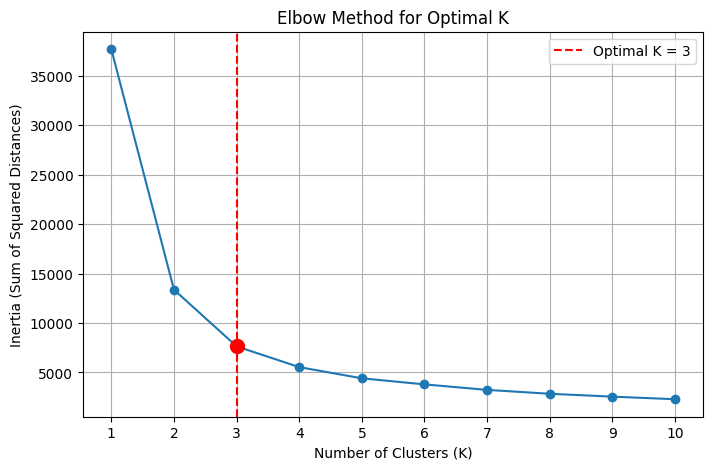

Detected Optimal K: 3


In [23]:
from kneed import KneeLocator

# Detect the elbow (optimal k)
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

# Plot with annotation
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(K_range)
plt.grid(True)

# Annotate the detected optimal K
if optimal_k:
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.scatter(optimal_k, inertia[optimal_k - min(K_range)], color='red', s=100, zorder=5)

plt.legend()
plt.show()

print(f'Detected Optimal K: {optimal_k}')

- Based on the Elbow Method plot, the optimal number of clusters appears to be K = 3. However, the initial K = 4 clustering remains valid, as it provided meaningful socioeconomic insights.
- To further validate and compare the clustering results, hierarchical clustering will be reperformed with K = 3 to explore potential differences in household segmentation.

In [24]:
fies_normalized['Cluster_K3'] = fcluster(linkage_matrix, t=optimal_k, criterion='maxclust')

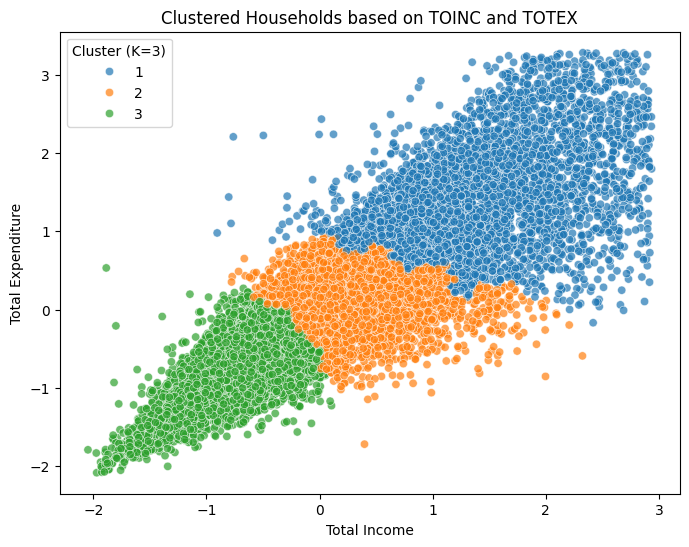

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=fies_normalized, 
    x='TOINC_scaled', 
    y='TOTEX_scaled', 
    hue='Cluster_K3', 
    palette='tab10', 
    alpha=0.7
)
plt.title('Clustered Households based on TOINC and TOTEX')
plt.xlabel('Total Income')
plt.ylabel('Total Expenditure')
plt.legend(title='Cluster (K=3)')
plt.show()

- Based on the cluster plot, the data points are **more well-distributed compared to the K=4 result**, while still following a clear linear trend — higher income generally correlates with higher expenditure.
    - **Cluster 1 (Blue):** Represents the majority of lower-middle to middle-income households, reflecting wealthier groups with generally higher income and higher expenditures.
    - **Cluster 2 (Orange):** Captures the lower-middle income households, showing balanced income and expenditure levels.
    - **Cluster 3 (Green):** Represents poor to lower-middle income households, reflecting financially constrained groups with low income and low expenditure.
- Overall, the clusters demonstrate minimal overlap and few outliers, indicating a clear separation of socioeconomic groups based on income and spending patterns.

In [26]:
profile = final_fies.merge(fies_normalized[['Cluster_K3']], left_index=True, right_index=True)
cluster_profile = profile.groupby('Cluster_K3').agg({
    'TOINC': ['mean', 'median'],
    'TOTEX': ['mean', 'median'],
    'FSIZE': 'mean',
    'WAGES': 'mean',
    'EAINC': 'mean',
    'IMPUTED_RENT': 'mean',
    'FOOD': 'mean',
    'NFOOD': 'mean',
    'SOCIAL_CLASS': lambda x: x.value_counts(normalize=True).to_dict()
})

cluster_profile


TOINC                    TOTEX                 FSIZE  \
                     mean    median           mean      median      mean   
Cluster_K3                                                                 
1           666610.091333  654587.5  505621.468494  488229.375  4.828018   
2           455349.062456  441345.0  338374.074781  340870.500  4.252588   
3           267099.923105  269210.0  222562.532608  224774.500  3.381357   

                    WAGES         EAINC  IMPUTED_RENT           FOOD  \
                     mean          mean          mean           mean   
Cluster_K3                                                             
1           457945.116629  63626.084055  68286.558998  185186.879626   
2           312661.615606  53101.469325  42315.269363  141434.868854   
3           175434.854036  29558.595650  28386.452499  100408.445972   

                    NFOOD                                       SOCIAL_CLASS  
                     mean                                           <lambda>  
Cluster_K3                                                                    
1           320434.588868  {'Lower-middle income': 0.5337129840546697, 'M...  
2           196939.205928  {'Lower-middle income': 0.9714340490797546, 'M...  
3           122154.086636  {'Low income': 0.7509197143475438, 'Lower-midd...

In [27]:
# Group by Cluster and SOCIAL_CLASS to get counts
social_class_dist = profile.groupby(['Cluster_K3', 'SOCIAL_CLASS']).size().reset_index(name='Count')

# Pivot the table for a cleaner view (clusters as rows, social classes as columns)
social_class_pivot = social_class_dist.pivot(index='Cluster_K3', columns='SOCIAL_CLASS', values='Count').fillna(0)

# Add percentage distribution per cluster
social_class_pct = social_class_pivot.div(social_class_pivot.sum(axis=1), axis=0) * 100

print("=== Social Class Distribution (Counts) ===")
print(social_class_pivot)

print("\n=== Social Class Distribution (Percentage) ===")
print(social_class_pct.round(2))


=== Social Class Distribution (Counts) ===
SOCIAL_CLASS  Low income  Lower-middle income  Middle income   Poor
Cluster_K3                                                         
1                    5.0               2343.0         2042.0    0.0
2                   47.0               5067.0          102.0    0.0
3                 6940.0               1661.0            0.0  641.0

=== Social Class Distribution (Percentage) ===
SOCIAL_CLASS  Low income  Lower-middle income  Middle income  Poor
Cluster_K3                                                        
1                   0.11                53.37          46.51  0.00
2                   0.90                97.14           1.96  0.00
3                  75.09                17.97           0.00  6.94


| Cluster (Color)  | Description                                 | Mean Income (₱) | Mean Expenditure (₱) | Avg. Household Size | Key Income Source                       | Social Class Composition                                                     | Spending Notes                                |
|------------------|---------------------------------------------|-----------------|----------------------|--------------------|-----------------------------------------|-------------------------------------------------------------------------------|-----------------------------------------------|
| **1 (Blue) 🔵**   | Wealthier Group | 666,610         | 505,621              | 4.83               | Wages dominant (₱457k), EAINC & Imputed Rent significant | 53.4% Lower-Middle Income, 46.5% Middle, 0.1% Low Income | Food (₱185k), Non-Food (₱320k)               |
| **2 (Orange) 🟠** | Stable Group / Balanced | 455,349         | 338,374              | 4.25               | Wages dominant (₱312k), EAINC & Imputed Rent moderate    | 97% Lower-Middle Income, 2% Middle, 1% Low Income | Food (₱141k), Non-Food (₱197k)               |
| **3 (Green) 🟢**  | Financially Constrained Households   | 267,100         | 222,563              | 3.38               | Wages low (₱175k), EAINC & Imputed Rent minimal          | 75% Low Income, 18% Lower-Middle, 7% Poor | Food (₱100k), Non-Food (₱122k)               |


- The summary statistics provide clearer insights into each cluster’s socioeconomic characteristics:
    - Cluster 1 (Blue 🔵) comprises the wealthier segment of the sample, a near-even mix of Middle and Lower-Middle Income households. This group has the highest average income and spending, with significant allocation toward non-food expenditures, indicating stronger financial capacity, asset ownership, and diverse consumption behavior.
    - Cluster 2 (Orange 🟠) captures the stable lower-middle income group with balanced income and expenses. While primarily composed of the Lower-Middle Income, this group demonstrates financial stability—able to cover necessities and some non-essential spending, signaling moderate economic comfort.
    - Cluster 3 (Green 🟢) captures the most financially constrained households, predominantly Low-Income, with some Lower-Middle Income and the only cluster containing the Poor class. Expenditure is focused heavily on essentials, with food and non-food spending nearly balanced, signaling limited financial flexibility and survival-level consumption behavior.

##### Silhouette Score Comparison

Silhouette Score for Cluster_K4: 0.406
Silhouette Score for Cluster_K3: 0.441


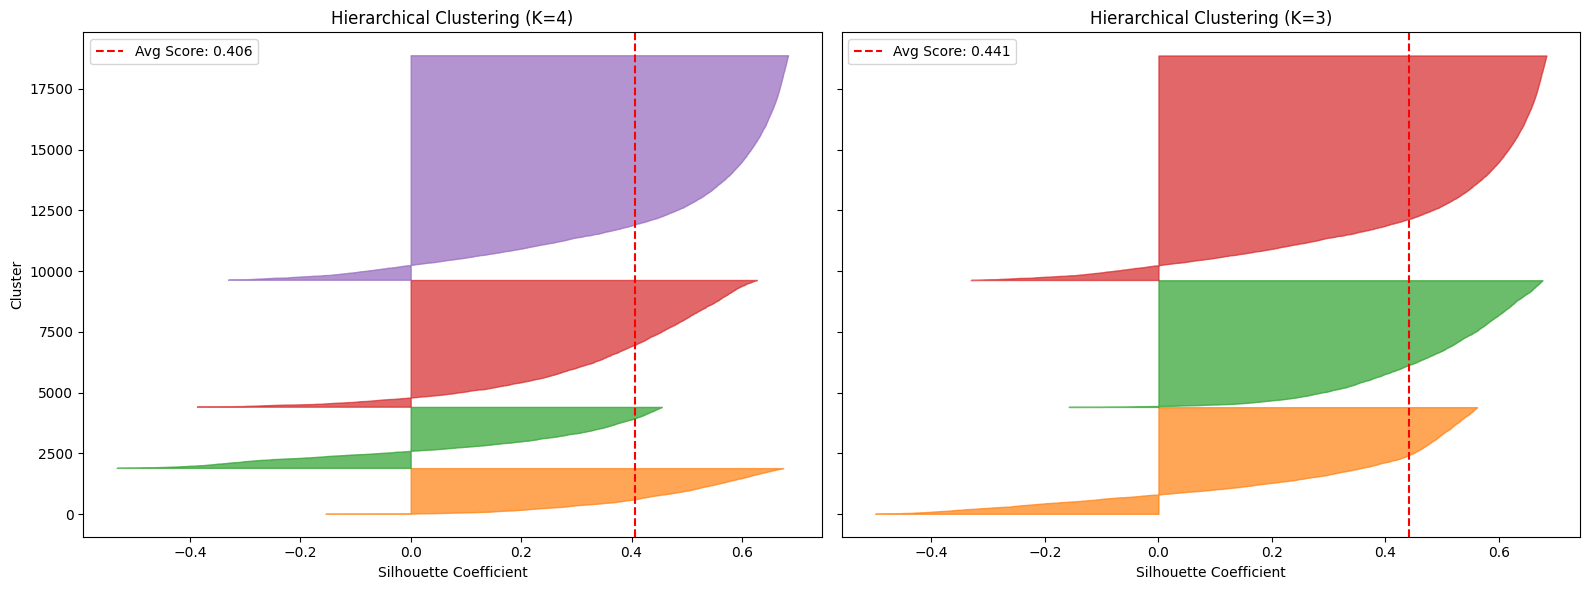

In [28]:
def compute_silhouette(fies_data, cluster_col):
    # Compute average silhouette score and sample scores
    score = silhouette_score(fies_data[['TOINC_scaled', 'TOTEX_scaled']], fies_data[cluster_col])
    silhouette_vals = silhouette_samples(fies_data[['TOINC_scaled', 'TOTEX_scaled']], fies_data[cluster_col])
    return score, silhouette_vals

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, (cluster_col, title) in enumerate([
    ('Cluster_K4', 'Hierarchical Clustering (K=4)'),
    ('Cluster_K3', 'Hierarchical Clustering (K=3)')
]):
    score, silhouette_vals = compute_silhouette(fies_normalized, cluster_col)
    print(f'Silhouette Score for {cluster_col}: {score:.3f}')
    
    y_lower = 10
    ax = axes[idx]
    for i in np.unique(fies_normalized[cluster_col]):
        ith_cluster_vals = silhouette_vals[fies_normalized[cluster_col] == i]
        ith_cluster_vals.sort()
        size_cluster_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(i / 10)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_vals, 
                         facecolor=color, edgecolor=color, alpha=0.7)

        y_lower = y_upper + 10  # Spacing between clusters

    ax.axvline(x=score, color="red", linestyle="--", label=f"Avg Score: {score:.3f}")
    ax.set_title(title)
    ax.set_xlabel('Silhouette Coefficient')
    if idx == 0:
        ax.set_ylabel('Cluster')
    ax.legend()

plt.tight_layout()
plt.show()


- To further validate the clustering quality, a silhouette analysis was performed. The silhouette score measures how well each household fits within its assigned cluster relative to neighboring clusters, with higher scores indicating better-defined clusters.
    - Results show that the hierarchical clustering with K=4 yields an average silhouette score of 0.406, while K=3 achieves a slightly higher score of 0.441. **This suggests that the K=3 clustering structure provides better overall cohesion and separation compared to K=4.**
    - Both clustering solutions are acceptable, especially considering the complexity and natural overlaps inherent in socioeconomic data. Some data points in both scenarios have negative silhouette scores, indicating they are potentially misclassified or lie near cluster boundaries. However, these cases are minimal, and the majority of households have positive silhouette values.
    - The silhouette plots also reveal imbalanced cluster sizes, with certain clusters dominating in both K=3 and K=4 solutions. This is expected in socioeconomic datasets where wealth distributions are typically skewed.
    - **Overall, K=3 appears slightly more effective** based on the silhouette score and plot shape, offering more compact and well-separated clusters. However, **K=4 may still be useful** if the added segmentation aligns better with analytical or policy goals (e.g., distinguishing a smaller middle-income segment).